# ST-CMDS - 数据分析报告

In [ ]:
!pip install pypinyin

In [81]:
import os
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import IPython.display as ipd
from tqdm import tqdm
from pypinyin import lazy_pinyin, Style

## 挂载 Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 解压数据

数据来自：[ST-CMDS - 下载数据](https://github.com/wu-jingtao/training-data/blob/master/speech_recognition/chinese/ST-CMDS/notebooks/ST-CMDS-下载数据.ipynb)

In [ ]:
!tar -zxvf /content/drive/Shareddrives/TeamDrive_top_edu/原始数据/ST-CMDS/ST-CMDS-20170001_1-OS.tar.gz > unzip_log.txt

## 工具方法

查看音频

In [33]:
def show_audio(name):
  audio, sr = librosa.load(f'/content/ST-CMDS-20170001_1-OS/{name}.wav', sr=None)
  with open(f'/content/ST-CMDS-20170001_1-OS/{name}.txt') as f:
    text = f.readlines()
  print(text)
  ipd.display(ipd.Audio(audio, rate=sr))

## 统计音频时长

In [8]:
audio_duration = dict()

for file in tqdm(glob.glob('/content/ST-CMDS-20170001_1-OS/*.wav')):
  name = os.path.splitext(os.path.split(file)[1])[0]
  audio_duration[name] = librosa.get_duration(filename=file)

audio_duration = pd.DataFrame.from_dict(audio_duration, orient='index', columns=['duration'])
audio_duration = audio_duration.sort_values('duration', ascending=False)

100%|██████████| 102600/102600 [03:06<00:00, 550.98it/s]


总时长（小时）

In [9]:
audio_duration.sum() / 3600

duration    109.732777
dtype: float64

总体特征

In [10]:
audio_duration.describe()

,duration
count,102600.000000
mean,3.850273
std,0.744704
min,1.200000
25%,3.306000
50%,3.775000
75%,4.313000
max,10.026000


时长分布

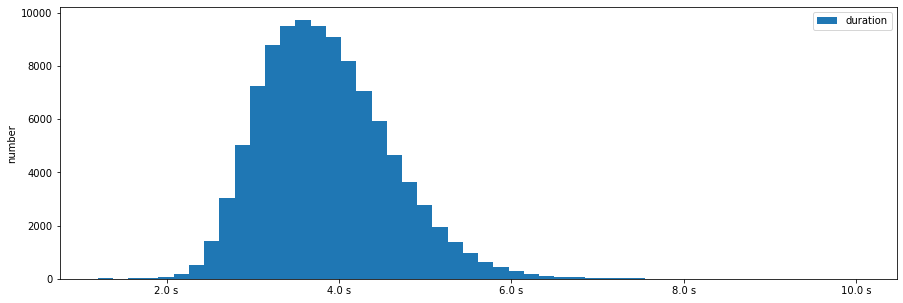

In [11]:
audio_duration.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))

最长的 5 条音频

In [12]:
audio_duration.head()

,duration
20170001P00187I0044,10.026
20170001P00286I0060,8.879
20170001P00187I0120,8.834
20170001P00187I0003,8.685
20170001P00187I0015,8.594


最短的 5 条音频

In [60]:
# 这几条都没有声音
audio_duration.tail()

,duration
20170001P00368A0036,1.2
20170001P00306A0036,1.2
20170001P00306A0110,1.2
20170001P00162A0032,1.2
20170001P00385A0105,1.2


## 统计句子长度

读取音频对应的拼音

In [15]:
sentences = dict()

for file in tqdm(glob.glob('/content/ST-CMDS-20170001_1-OS/*.txt')):
  name = os.path.splitext(os.path.splitext(os.path.split(file)[1])[0])[0]
  with open(file) as f:
    words = next(f).strip()
  sentences[name] = words

100%|██████████| 102600/102600 [01:34<00:00, 1090.51it/s]


计算字数

In [16]:
sentences_length = dict()
for k, v in sentences.items():
  sentences_length[k] = len(v)

sentences_length = pd.DataFrame.from_dict(sentences_length, orient='index', columns=['length'])
sentences_length = sentences_length.sort_values('length', ascending=False)

总字数

In [17]:
sentences_length.sum()

length    1119321
dtype: int64

总体特征

In [18]:
sentences_length.describe()

,length
count,102600.000000
mean,10.909561
std,2.579142
min,1.000000
25%,9.000000
50%,11.000000
75%,13.000000
max,22.000000


长度分布

Text(0, 0.5, 'number')

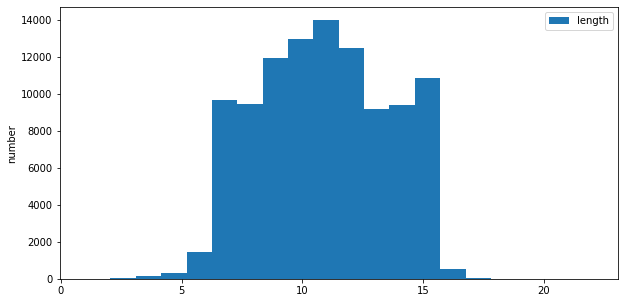

In [22]:
sentences_length.plot.hist(bins=20, figsize=(10, 5))
plt.ylabel('number')

最长的 5 条句子

In [23]:
sentences_length.head()

,length
20170001P00328A0120,22
20170001P00274A0009,20
20170001P00040A0027,18
20170001P00376A0078,18
20170001P00070I0033,18


最短的 5 条句子

In [63]:
sentences_length.tail().iloc[::-1]

,length
20170001P00355I0040,1
20170001P00027A0089,2
20170001P00036I0033,2
20170001P00137I0033,2
20170001P00146I0090,2


## 统计语速变化

In [24]:
speed_change = audio_duration['duration'] / sentences_length['length'] * 1000
speed_change = pd.DataFrame(speed_change, columns=['speed (ms)'])
speed_change = speed_change.sort_values('speed (ms)', ascending=False)

总体特征

In [25]:
speed_change.describe()

,speed (ms)
count,102600.000000
mean,362.700462
std,66.027967
min,80.000000
25%,315.545455
50%,354.250000
75%,400.732955
max,1690.000000


语速分布

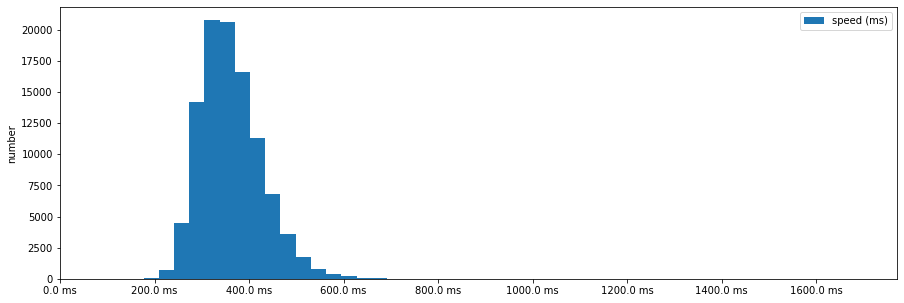

In [26]:
speed_change.plot.hist(bins=50, figsize=(15, 5))
plt.ylabel('number')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f ms'))

语速最快的 5 条音频

In [27]:
# 这几条都没有声音
speed_change.tail().iloc[::-1]

,speed (ms)
20170001P00294A0119,80.000000
20170001P00413A0119,80.000000
20170001P00368A0036,85.714286
20170001P00385A0105,92.307692
20170001P00011I0088,100.000000


语速最慢的 5 条音频

In [28]:
speed_change.head()

,speed (ms)
20170001P00355I0040,1690.000000
20170001P00146I0090,1134.500000
20170001P00235I0024,1116.666667
20170001P00389I0023,1068.500000
20170001P00087I0088,1025.500000


语速小于 `200ms` 的音频

In [58]:
# 20170001P00366A0114 没声音
# 20170001P00240A0072 缺了个字
# 20170001P00240A0077 音频与文字完全对不上
speed_change[speed_change['speed (ms)'] < 200].sort_values('speed (ms)', ascending=False).head()

,speed (ms)
20170001P00366A0114,200.000000
20170001P00240A0072,199.933333
20170001P00240A0077,199.066667
20170001P00240A0117,198.461538
20170001P00240A0037,197.642857


## 统计发音覆盖范围

### 5 种声调的分布情况

In [85]:
pinyin_distribution = dict()

for words in sentences.values():
  pinyins = lazy_pinyin(words, Style.TONE3, neutral_tone_with_five=True)
  for i in pinyins:
    if i in pinyin_distribution:
      pinyin_distribution[i] +=1 
    else:
      pinyin_distribution[i] = 1

pinyin_distribution = pd.DataFrame.from_dict(pinyin_distribution, orient='index', columns=['number'])
pinyin_distribution = pinyin_distribution.sort_values('number', ascending=False)

总体特征

In [86]:
# 从结果来看，这个数据集并没有覆盖到所有的发音，一个使用4种声调的拼音表有1644种发音，而这里使用5种声调却只有1184种
pinyin_distribution.describe()

,number
count,1184.000000
mean,945.369932
std,2328.250713
min,1.000000
25%,59.000000
50%,248.000000
75%,867.250000
max,34421.000000


发音分布

Text(0, 0.5, 'number')

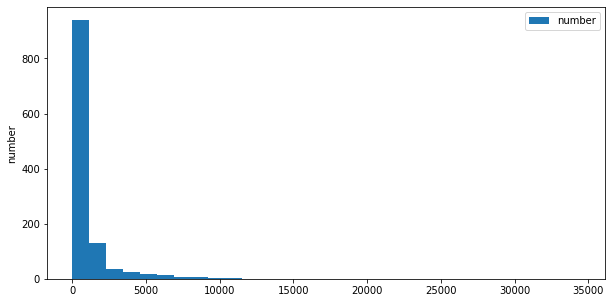

In [87]:
pinyin_distribution.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [88]:
pinyin_distribution.head()

,number
de5,34421
wo3,30305
ni3,25563
shi4,24839
le5,19363


### 去除声调后的分布情况

In [95]:
pinyin_distribution_without_intonation = dict()

for words in sentences.values():
  pinyins = lazy_pinyin(words)
  for i in pinyins:
    if i in pinyin_distribution_without_intonation:
      pinyin_distribution_without_intonation[i] +=1 
    else:
      pinyin_distribution_without_intonation[i] = 1

pinyin_distribution_without_intonation = pd.DataFrame.from_dict(pinyin_distribution_without_intonation, orient='index', columns=['number'])
pinyin_distribution_without_intonation = pinyin_distribution_without_intonation.sort_values('number', ascending=False)

总体特征

In [96]:
# 从结果来看，不带声调的发音覆盖的比较好，不带声调的拼音表有411种发音，这里有407种
pinyin_distribution_without_intonation.describe()

,number
count,407.000000
mean,2750.167076
std,4358.963395
min,1.000000
25%,394.000000
50%,1333.000000
75%,3346.000000
max,36389.000000


发音分布

Text(0, 0.5, 'number')

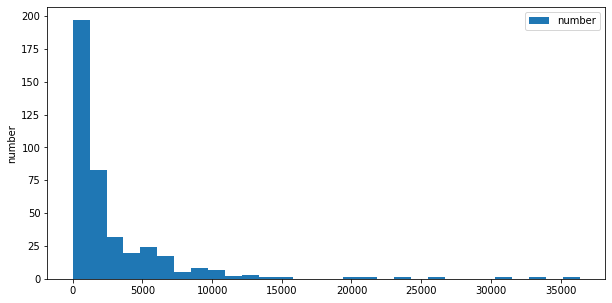

In [97]:
pinyin_distribution_without_intonation.plot.hist(bins=30, figsize=(10, 5))
plt.ylabel('number')

出现次数前 5 的发音

In [98]:
pinyin_distribution_without_intonation.head()

,number
de,36389
shi,33712
wo,30480
ni,25983
yi,23903
